# Python Data Visualization Exercises - Seaborn

This notebook will be used to create visualizations from the dataset CarsForSale, available on Kaggle, using Pandas, NumPy, Matplotlib, and Seaborn libraries.

In [2]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

Using GitHuB API to import the data on the CSV file.

In [3]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Python-Data-Visualization-Exercises/main/cars_raw.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2636k  100 2636k    0     0  2687k      0 --:--:-- --:--:-- --:--:-- 2684k


Taking the data to a DataFrame.

In [4]:
df = pd.read_csv('/content/cars_raw.csv')

df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


Checking some columns values distribution, to see what should be interesting to plot.

In [5]:
df['Year'].value_counts()

2019    3263
2020    2012
2021    1335
2018    1067
2017     573
2016     332
2015     236
2014     142
2013     106
2022      94
2012      68
2011      45
2010      32
2008      15
2007      13
2005      11
2004       9
2009       9
2006       8
2003       7
2002       1
2001       1
Name: Year, dtype: int64

In [6]:
df['Make'].value_counts()

BMW              944
Mercedes-Benz    810
Toyota           797
Honda            713
Ford             580
Jeep             495
Lexus            484
Audi             424
Chevrolet        416
Subaru           310
Cadillac         299
Nissan           251
GMC              250
Kia              240
Acura            231
INFINITI         216
Hyundai          212
Mazda            205
Tesla            186
Land             174
Volvo            148
RAM              145
Dodge            145
Volkswagen       140
Porsche          134
Lincoln          120
Buick            114
Chrysler          39
Alfa              38
Jaguar            30
Mitsubishi        20
Genesis           19
Maserati          15
Lamborghini       14
Bentley            6
MINI               5
Scion              4
FIAT               2
Mercury            2
Saturn             1
Ferrari            1
Name: Make, dtype: int64

In [7]:
df['Used/New'].value_counts()

Used                       7900
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               55
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
INFINITI Certified           34
Kia Certified                34
Volvo Certified              33
Porsche Certified            25
RAM Certified                24
Buick Certified              20
Volkswagen Certified         17
GMC Certified                13
Dodge Certified              10
Alfa Romeo Certified          7
Bentley Certified             2
MINI Certified                1
Ferrari Certified             1
Maserati Certified            1
Name: Used/New, dtype: int64

In [8]:
df['InteriorColor'].value_counts()

Black             3758
–                 1088
Jet Black          486
Gray               420
Ebony              412
                  ... 
Amaro Brown          1
Cinnamon Brown       1
Ivory / Blue         1
Oyster/Black         1
Hotspur              1
Name: InteriorColor, Length: 374, dtype: int64

In [9]:
df['Drivetrain'].value_counts()

All-wheel Drive      4476
Front-wheel Drive    2329
Four-wheel Drive     1549
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
–                       7
Front Wheel Drive       1
Name: Drivetrain, dtype: int64

In [10]:
df['FuelType'].value_counts()

Gasoline                         8905
Electric                          162
E85 Flex Fuel                     121
Hybrid                             69
Diesel                             45
Gasoline Fuel                      30
–                                  30
Electric Fuel System                5
Gasoline/Mild Electric Hybrid       5
Flex Fuel Capability                3
Flexible Fuel                       2
Plug-In Electric/Gas                1
Diesel Fuel                         1
Name: FuelType, dtype: int64

In [11]:
df['Transmission'].value_counts()

8-Speed Automatic                      3202
6-Speed Automatic                      1676
Automatic CVT                          1294
9-Speed Automatic                      1015
10-Speed Automatic                      448
                                       ... 
6 speed manual                            1
xtronic cvt (continuously variable)       1
Auto, 7-Spd Rev Matching                  1
8 speed tiptronic s automatic             1
Auto 8-Spd Spt Steptrnc                   1
Name: Transmission, Length: 93, dtype: int64

Converting Price column to int.

In [25]:
df['Price'] = df.Price.str.replace('Not Priced', '', regex=False)
df['Price'] = df.Price.str.replace('$', '', regex=False)
df['Price'] = df.Price.str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'])

Converting Drivetrain similar values.

In [42]:
df['Drivetrain'] = df.Drivetrain.str.replace('FWD', 'Front-wheel Drive', regex=False)
df['Drivetrain'] = df.Drivetrain.str.replace('Front Wheel Drive', 'Front-wheel Drive', regex=False)

df['Drivetrain'] = df.Drivetrain.str.replace('RWD', 'Rear-wheel Drive', regex=False)

df['Drivetrain'] = df.Drivetrain.str.replace('AWD', 'All-wheel Drive', regex=False)
df['Drivetrain'] = df.Drivetrain.str.replace('4WD', 'All-wheel Drive', regex=False)
df['Drivetrain'] = df.Drivetrain.str.replace('Four-wheel Drive', 'All-wheel Drive', regex=False)

In [43]:
df['Drivetrain'].value_counts()

All-wheel Drive      6079
Front-wheel Drive    2366
Rear-wheel Drive      927
–                       7
Name: Drivetrain, dtype: int64

Setting figures sizes, and checking available styles.

In [138]:
plt.rcParams['figure.figsize'] = [12,12]

In [139]:
sns.set_theme(style='darkgrid', palette='Set2')

#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.color_palette('Set2')
#sns.color_palette('viridis', as_cmap=True)

Plotting some visualizations from the dataset.

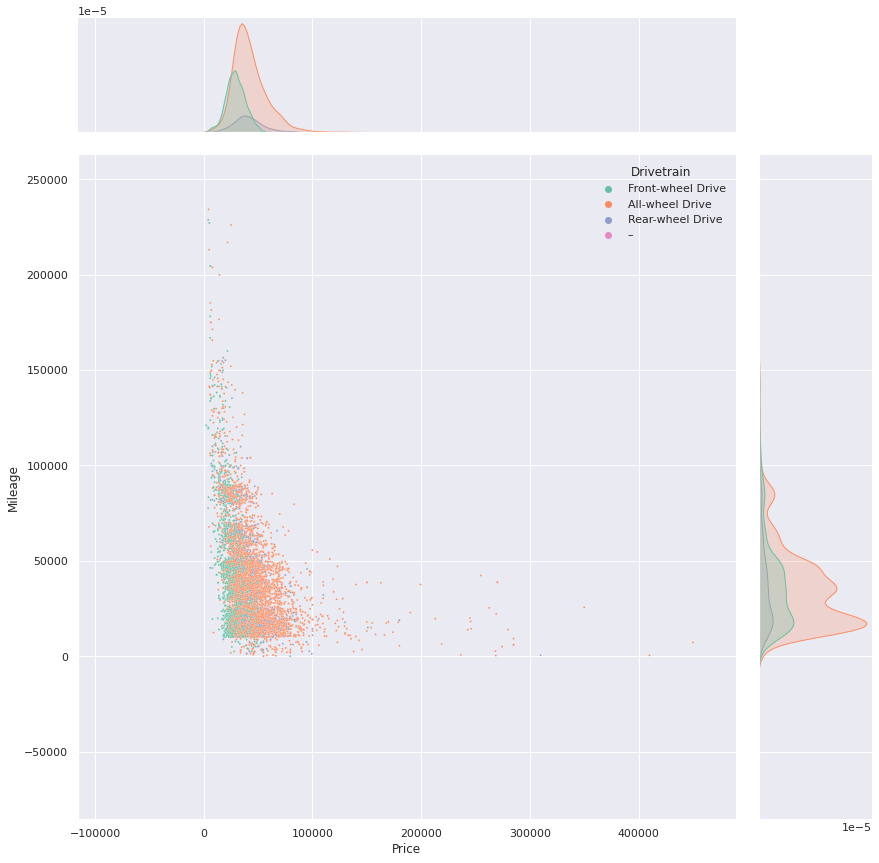

In [140]:
sns.jointplot(x='Price', y='Mileage', hue='Drivetrain', data=df, height = 12, s=4)

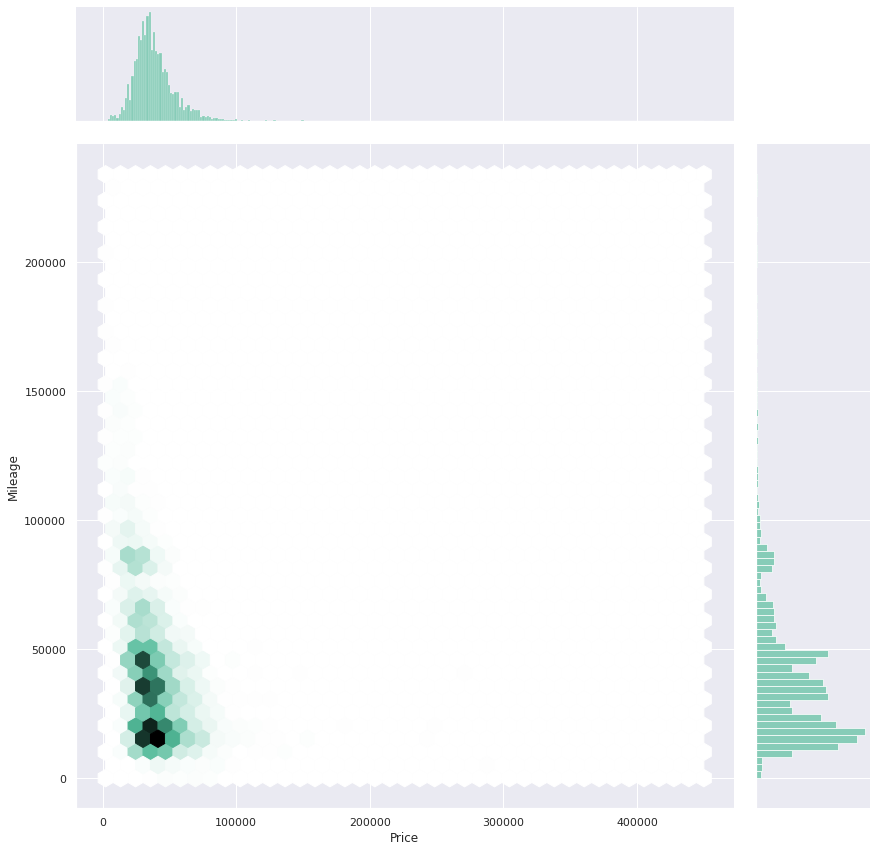

In [144]:
sns.jointplot(x='Price', y='Mileage', kind='hex', data=df, height = 12, gridsize=40)

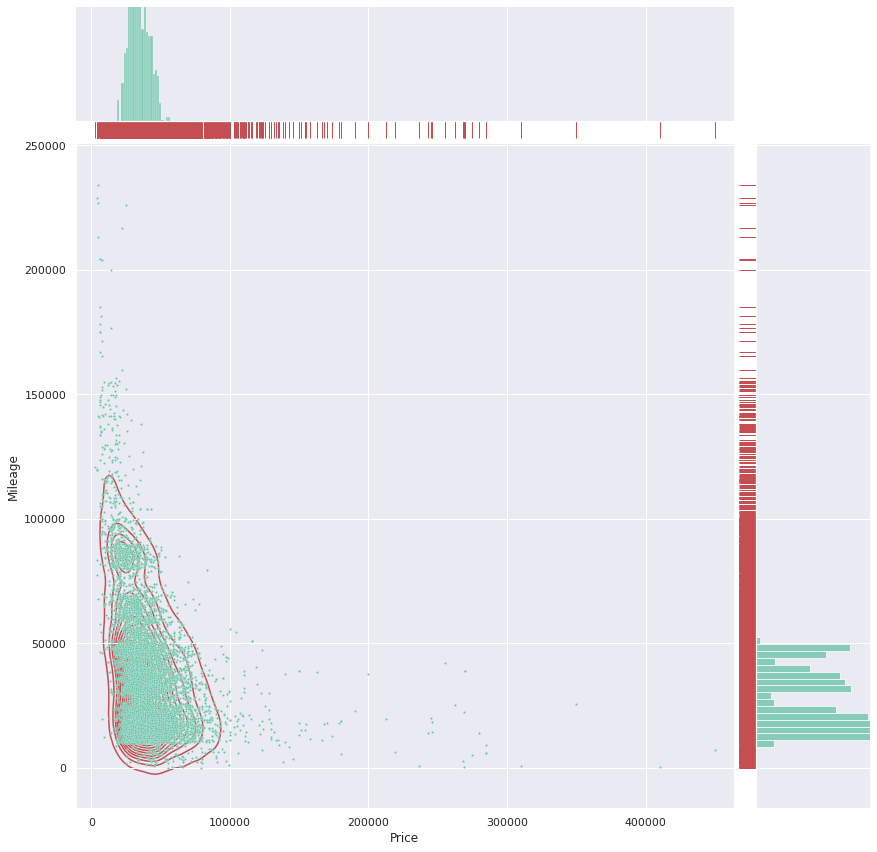

In [142]:
g = sns.jointplot(data=df, x="Price", y="Mileage", s=5 , height = 12)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=16)
g.plot_marginals(sns.rugplot, color="r", height=-0.15, clip_on=False)

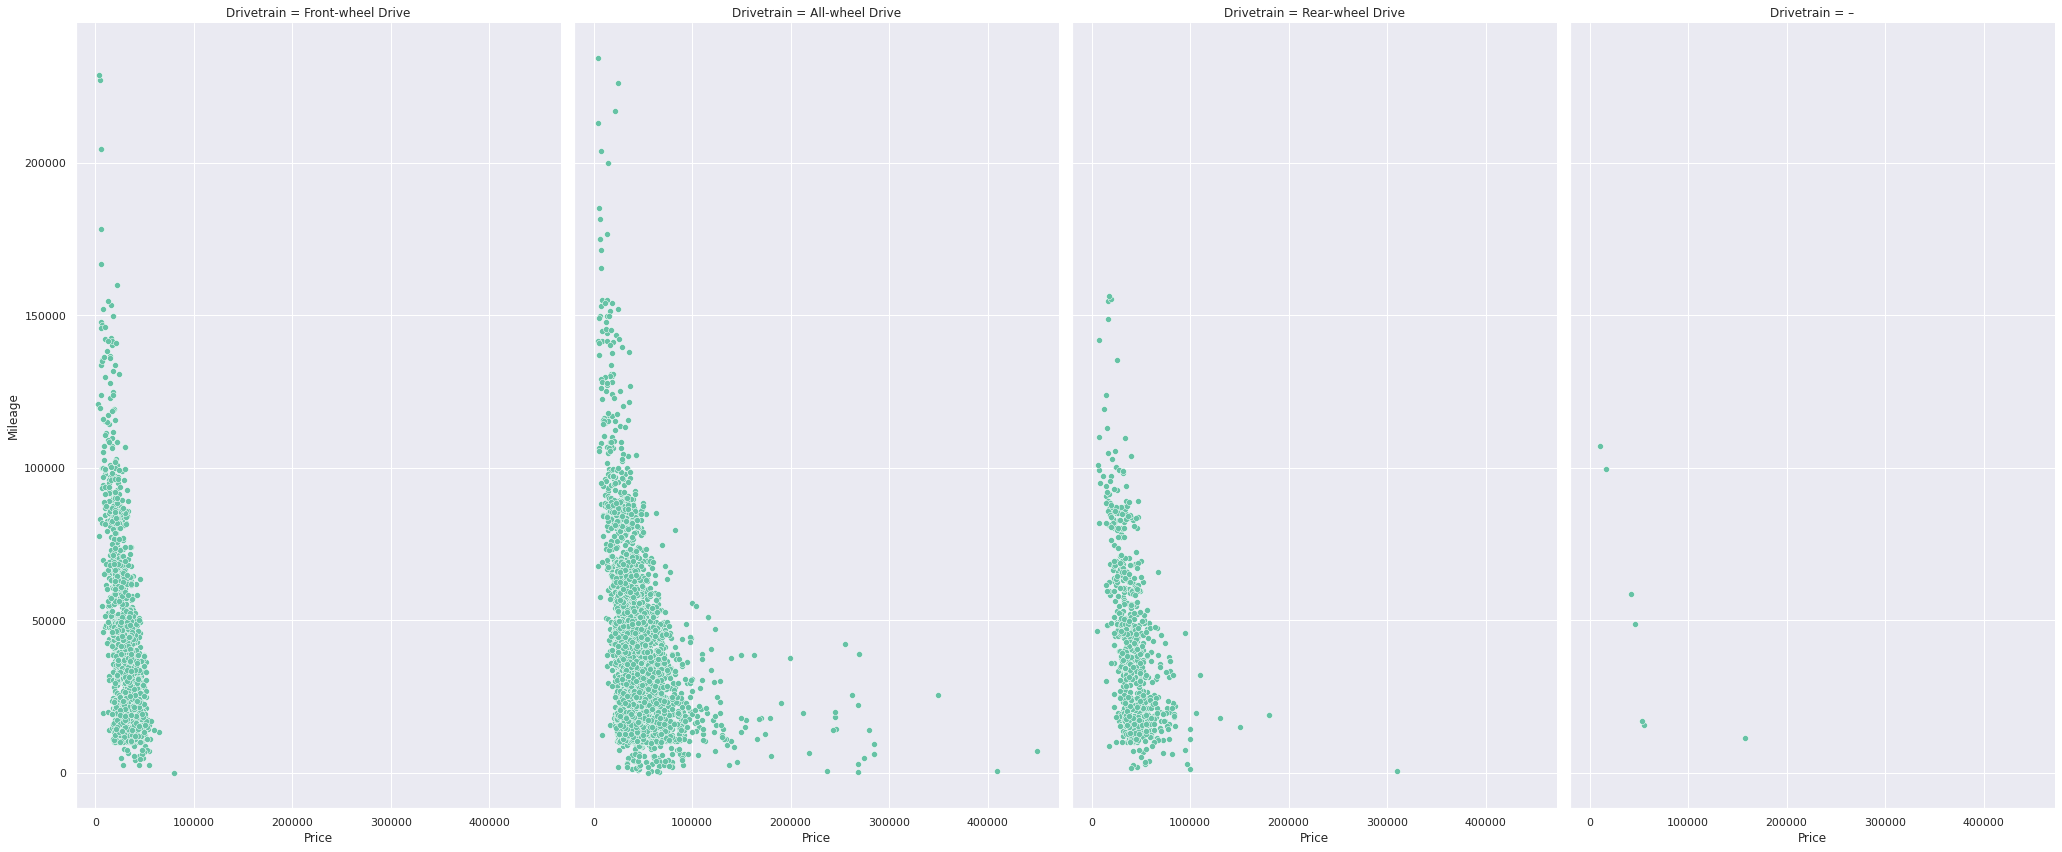

In [143]:
sns.relplot(x='Price', y='Mileage', col='Drivetrain', data=df, height = 12, aspect = 0.6)

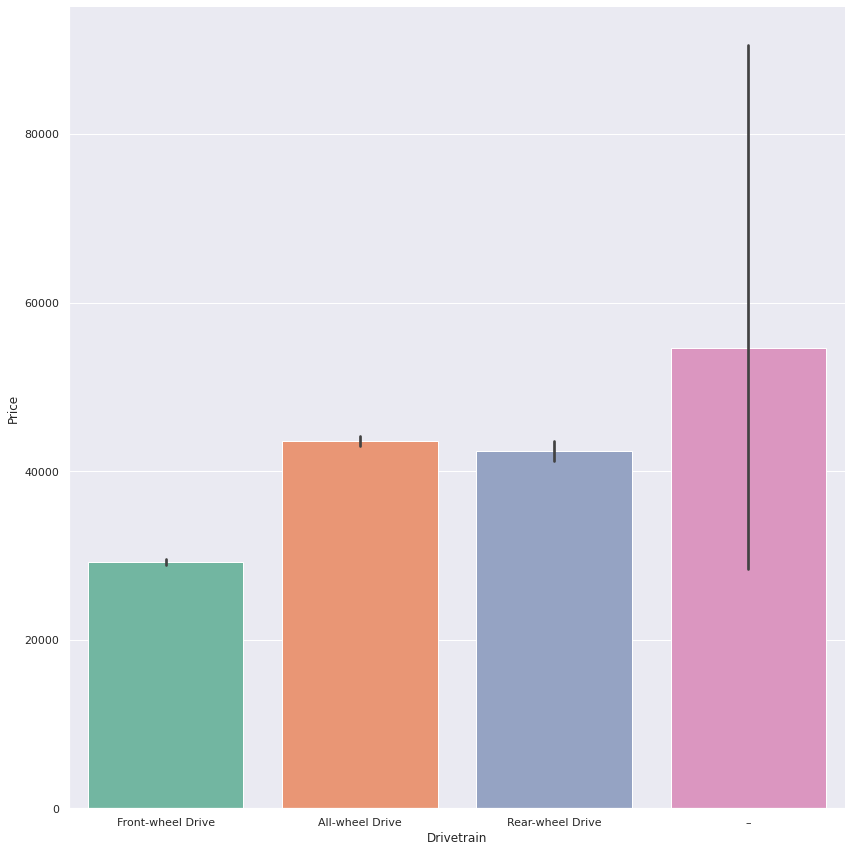

In [145]:
sns.catplot(data=df, kind="bar", x="Drivetrain", y="Price", height = 12)

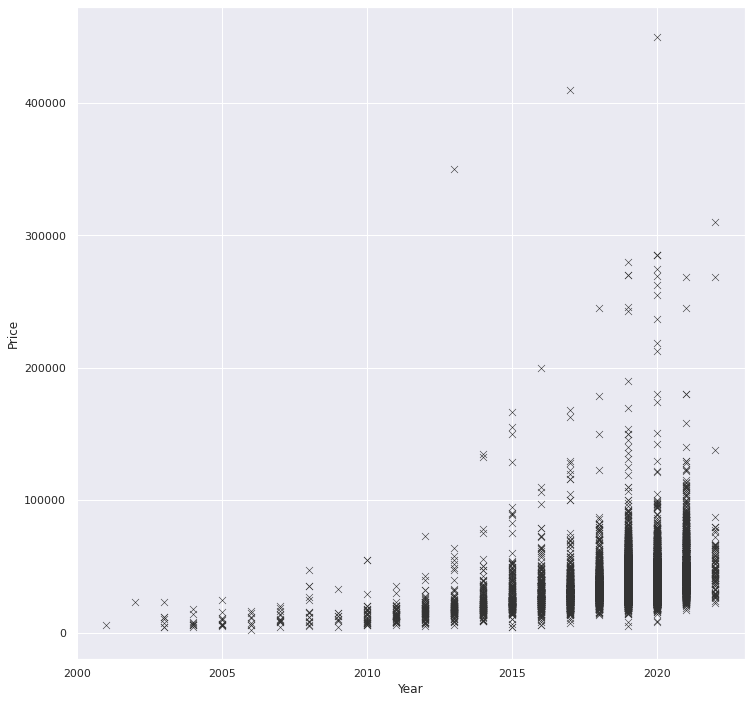

In [151]:
sns.scatterplot(data=df, x="Year", y="Price", s=50, color=".2", marker="x")